In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
n = 100
prob = 0.75
F_H0 = stats.binom(n, prob)

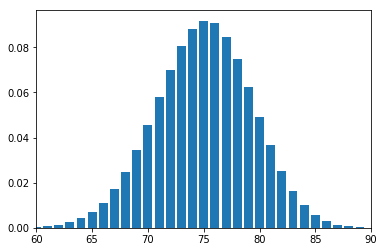

In [3]:
x = np.linspace(0,100,101)

plt.bar(x, F_H0.pmf(x), align = 'center')
plt.xlim(60, 90) 
plt.show()

In [4]:
stats.binom_test(67, 100, prob)

0.08222258891386608

In [5]:
stats.binom_test(22, 50, prob)

3.4831478978300243e-06

In [8]:
pines_data = pd.read_csv('pines.txt', sep = '\t')
pines_data.describe()
pines_data.head()

,sn,we
0,200.0,8.8
1,199.3,10.0
2,193.6,22.4
3,167.7,35.6
4,183.9,45.4


F:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


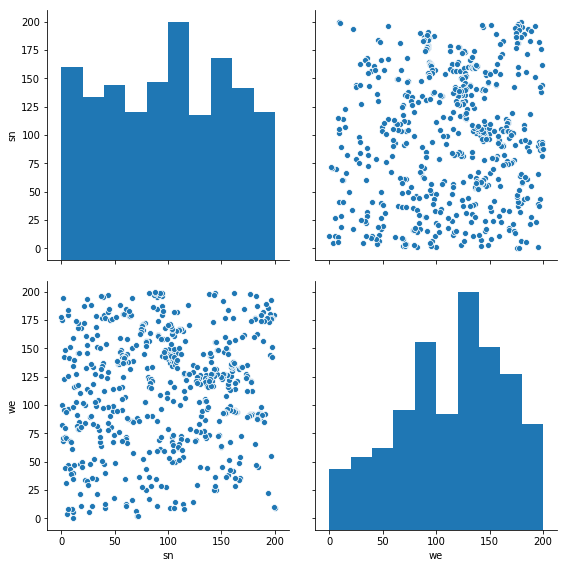

In [9]:
sns.pairplot(pines_data, size=4);

In [10]:
sn_num, we_num = 5, 5

trees_bins = stats.binned_statistic_2d(pines_data.sn, pines_data.we, None, statistic='count', bins=[sn_num, we_num])

trees_squares_num = trees_bins.statistic
trees_squares_num
trees_bins.x_edge
trees_bins.y_edge


array([  0.,  40.,  80., 120., 160., 200.])

In [13]:
trees_squares_num

array([[18., 26., 29., 25., 20.],
       [14., 12., 22., 34., 25.],
       [12., 24., 15., 50., 37.],
       [ 8., 19., 31., 50.,  7.],
       [ 7.,  8., 37., 27., 27.]])

In [11]:
mean_trees_num = np.sum(trees_squares_num) / 25
print(mean_trees_num)

23.36


In [12]:
stats.chisquare(trees_squares_num.flatten(), ddof = 0)

Power_divergenceResult(statistic=150.58904109589042, pvalue=2.574669774967279e-20)